# F1 Pit Stop Strategy - Model Training

**Goal:** Train an ML model to predict optimal pit stop timing

**What we're predicting:** `LapNumber` - when the pit stop occurs

**Features (inputs):** 13 variables including tire age, position, speed, track conditions

**Algorithm:** XGBoost Regressor (predicts continuous values)

**Success Metrics:**
- MAE (Mean Absolute Error) - How many laps off are predictions?
- R² Score - How well does model explain variance?
- RMSE (Root Mean Squared Error) - Penalizes large errors

**Why this matters:** Accurate pit timing can save 10-20 seconds per race!

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import  mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings("ignore")



In [2]:
df = pd.read_csv('data/processed/ml_features_update.csv')

print("📊 Dataset loaded!")
print(f"   Rows: {len(df)}")
print(f"   Columns: {len(df.columns)}")

print(f"\n📋 Columns:")
print(df.columns.tolist())

print(f"\n🔍 First few rows:")
df.head()

📊 Dataset loaded!
   Rows: 2017
   Columns: 15

📋 Columns:
['LapNumber', 'TyreLife', 'FreshTyre', 'Position', 'Stint', 'SpeedFL', 'Year', 'LapTime_seconds', 'has_safety_car', 'has_vsc', 'has_red_flag', 'has_yellow', 'Compound_encoded', 'Driver_encoded', 'RaceName_encoded']

🔍 First few rows:


,LapNumber,TyreLife,FreshTyre,Position,Stint,SpeedFL,Year,LapTime_seconds,has_safety_car,has_vsc,has_red_flag,has_yellow,Compound_encoded,Driver_encoded,RaceName_encoded
0,15.0,1.0,False,2.0,2.0,279.0,2023,118.378,0,0,0,0,1,30,5
1,37.0,1.0,True,1.0,3.0,281.0,2023,118.490,0,0,0,0,3,30,5
2,10.0,1.0,True,20.0,2.0,278.0,2023,121.262,0,0,0,0,3,6,5
3,26.0,1.0,True,17.0,3.0,280.0,2023,119.404,0,0,0,0,3,6,5
4,41.0,1.0,True,10.0,4.0,289.0,2023,128.544,0,1,0,0,1,6,5


In [3]:
target = 'LapNumber'

feature_columns = [col for col in df.columns if col != target]

X = df[feature_columns]
y = df[target]

print(f"\n🎯 Target variable: {target}")
print(f"   Shape: {y.shape}")
print(f"   Min lap: {y.min()}")
print(f"   Max lap: {y.max()}")
print(f"   Average: {y.mean():.1f}")

print(f"\n📊 Features: {len(feature_columns)} variables")
print(f"   Shape: {X.shape}")
print(f"\n📋 Feature list:")
for i, col in enumerate(feature_columns, 1):
    print(f"   {i:2}. {col}")


🎯 Target variable: LapNumber
   Shape: (2017,)
   Min lap: 1.0
   Max lap: 79.0
   Average: 27.6

📊 Features: 14 variables
   Shape: (2017, 14)

📋 Feature list:
    1. TyreLife
    2. FreshTyre
    3. Position
    4. Stint
    5. SpeedFL
    6. Year
    7. LapTime_seconds
    8. has_safety_car
    9. has_vsc
   10. has_red_flag
   11. has_yellow
   12. Compound_encoded
   13. Driver_encoded
   14. RaceName_encoded


In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split complete!")
print(f"\n📊 Training set:")
print(f"   X_train shape: {X_train.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"   Pit stops for training: {len(X_train)}")

print(f"\n📊 Testing set:")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_test shape: {y_test.shape}")
print(f"   Pit stops for testing: {len(X_test)}")

print(f"\n🎯 We'll train on {len(X_train)} pit stops")
print(f"🎯 We'll test on {len(X_test)} pit stops")

print(f"\n📈 Target variable distribution:")
print(f"   Training avg: {y_train.mean():.1f} laps")
print(f"   Testing avg: {y_test.mean():.1f} laps")

✅ Data split complete!

📊 Training set:
   X_train shape: (1613, 14)
   y_train shape: (1613,)
   Pit stops for training: 1613

📊 Testing set:
   X_test shape: (404, 14)
   y_test shape: (404,)
   Pit stops for testing: 404

🎯 We'll train on 1613 pit stops
🎯 We'll test on 404 pit stops

📈 Target variable distribution:
   Training avg: 27.8 laps
   Testing avg: 26.9 laps


In [5]:
#XGBoost Regressor training
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    verbosity=0
)

print("✅ Model created!")
print(f"\n📋 Model parameters:")
print(f"   Trees: {model.n_estimators}")
print(f"   Learning rate: {model.learning_rate}")
print(f"   Max depth: {model.max_depth}")

print(f"\n🎓 Training model on {len(X_train)} pit stops...")
print("   (This might take 5-10 seconds...)")

model.fit(X_train, y_train)

print("\n🎉 MODEL TRAINED SUCCESSFULLY!")
print(f"   The model has learned patterns from {len(X_train)} pit stops!")
print("   Now it can predict pit timing for new races!")

✅ Model created!

📋 Model parameters:
   Trees: 100
   Learning rate: 0.1
   Max depth: 6

🎓 Training model on 1613 pit stops...
   (This might take 5-10 seconds...)

🎉 MODEL TRAINED SUCCESSFULLY!
   The model has learned patterns from 1613 pit stops!
   Now it can predict pit timing for new races!


In [6]:
print("🔮 Making predictions on test set...")

# Predict on training data (to see how well it learned)
y_train_pred = model.predict(X_train)

# Predict on test data (the real test!)
y_test_pred = model.predict(X_test)

print("✅ Predictions complete!")

print(f"\n📊 Training set predictions:")
print(f"   Made {len(y_train_pred)} predictions")
print(f"   Example predictions: {y_train_pred[:5].round(1)}")
print(f"   Actual values:       {y_train.values[:5]}")

print(f"\n📊 Test set predictions:")
print(f"   Made {len(y_test_pred)} predictions")
print(f"   Example predictions: {y_test_pred[:5].round(1)}")
print(f"   Actual values:       {y_test.values[:5]}")

# Compare a few predictions
print(f"\n🔍 Sample comparisons (first 10 from test set):")
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_test_pred[:10].round(1),
    'Difference': (y_test.values[:10] - y_test_pred[:10]).round(1)
})
print(comparison)

print(f"\n💡 Difference = How many laps off the prediction was")
print(f"   Positive = Predicted too early")
print(f"   Negative = Predicted too late")

🔮 Making predictions on test set...
✅ Predictions complete!

📊 Training set predictions:
   Made 1613 predictions
   Example predictions: [47.9 21.5  4.3 33.9 24.5]
   Actual values:       [47. 19.  3. 39. 20.]

📊 Test set predictions:
   Made 404 predictions
   Example predictions: [45.9 17.6  7.6 16.5 61.4]
   Actual values:       [49. 14.  3. 11. 60.]

🔍 Sample comparisons (first 10 from test set):
   Actual  Predicted  Difference
0    49.0  45.900002         3.1
1    14.0  17.600000        -3.6
2     3.0   7.600000        -4.6
3    11.0  16.500000        -5.5
4    60.0  61.400002        -1.4
5    28.0  40.799999       -12.8
6     2.0  23.000000       -21.0
7     2.0   7.400000        -5.4
8    32.0  32.599998        -0.6
9    15.0  29.700001       -14.7

💡 Difference = How many laps off the prediction was
   Positive = Predicted too early
   Negative = Predicted too late


In [7]:
# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("📊 MODEL PERFORMANCE METRICS")
print("=" * 60)

print("\n🎓 Training Set Performance:")
print(f"   MAE (Mean Absolute Error):  {train_mae:.2f} laps")
print(f"   RMSE (Root Mean Squared):    {train_rmse:.2f} laps")
print(f"   R² Score:                    {train_r2:.3f}")

print("\n🎯 Test Set Performance (THE REAL TEST):")
print(f"   MAE (Mean Absolute Error):  {test_mae:.2f} laps")
print(f"   RMSE (Root Mean Squared):    {test_rmse:.2f} laps")
print(f"   R² Score:                    {test_r2:.3f}")

print("\n" + "=" * 60)
print("📖 WHAT THESE METRICS MEAN:")
print("=" * 60)

print(f"\n🎯 MAE (Mean Absolute Error): {test_mae:.2f} laps")
print(f"   → On average, predictions are off by {test_mae:.1f} laps")
print(f"   → Lower is better (0 = perfect)")

print(f"\n🎯 RMSE: {test_rmse:.2f} laps")
print(f"   → Penalizes large errors more heavily")
print(f"   → {test_rmse:.1f} laps error including outliers")

print(f"\n🎯 R² Score: {test_r2:.3f}")
print(f"   → Model explains {test_r2*100:.1f}% of variance in pit timing")
print(f"   → 1.0 = perfect, 0.0 = random guessing")
if test_r2 > 0.7:
    print(f"   → ✅ GOOD! Model captures most patterns")
elif test_r2 > 0.5:
    print(f"   → 👍 Decent! Model has predictive power")
else:
    print(f"   → ⚠️  Room for improvement")

# Compare to baseline (always guessing average)
baseline_mae = np.mean(np.abs(y_test - y_test.mean()))
improvement = ((baseline_mae - test_mae) / baseline_mae) * 100

print(f"\n📈 Improvement over baseline:")
print(f"   Baseline (always guess {y_test.mean():.1f}): {baseline_mae:.2f} laps error")
print(f"   Our model:                                {test_mae:.2f} laps error")
print(f"   → {improvement:.1f}% better than guessing average!")

📊 MODEL PERFORMANCE METRICS

🎓 Training Set Performance:
   MAE (Mean Absolute Error):  2.74 laps
   RMSE (Root Mean Squared):    3.75 laps
   R² Score:                    0.942

🎯 Test Set Performance (THE REAL TEST):
   MAE (Mean Absolute Error):  5.36 laps
   RMSE (Root Mean Squared):    7.24 laps
   R² Score:                    0.772

📖 WHAT THESE METRICS MEAN:

🎯 MAE (Mean Absolute Error): 5.36 laps
   → On average, predictions are off by 5.4 laps
   → Lower is better (0 = perfect)

🎯 RMSE: 7.24 laps
   → Penalizes large errors more heavily
   → 7.2 laps error including outliers

🎯 R² Score: 0.772
   → Model explains 77.2% of variance in pit timing
   → 1.0 = perfect, 0.0 = random guessing
   → ✅ GOOD! Model captures most patterns

📈 Improvement over baseline:
   Baseline (always guess 26.9): 12.60 laps error
   Our model:                                5.36 laps error
   → 57.4% better than guessing average!


In [8]:
import joblib
from pathlib import Path

# Create models directory
Path("models").mkdir(exist_ok=True)

# Save the multi-season model (current one)
model_path_multi = 'models/pit_strategy_multi_season.pkl'
joblib.dump(model, model_path_multi)

print(f"✅ Saved multi-season model:")
print(f"   Path: {model_path_multi}")
print(f"   R²: {test_r2:.3f}")
print(f"   MAE: {test_mae:.2f} laps")
print(f"   Training data: 2,017 pit stops (2020-2024)")

# Create metadata
import json

model_metadata = {
    "multi_season": {
        "file": "pit_strategy_multi_season.pkl",
        "r2_score": float(test_r2),
        "mae": float(test_mae),
        "rmse": float(test_rmse),
        "training_samples": len(X_train),
        "test_samples": len(X_test),
        "features": list(X.columns),
        "seasons": [2020, 2021, 2023, 2024],
        "description": "Robust model trained on multiple seasons, handles regulation changes"
    }
}

# Save metadata
with open('models/model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2)

print(f"\n📋 Model metadata saved to models/model_metadata.json")

✅ Saved multi-season model:
   Path: models/pit_strategy_multi_season.pkl
   R²: 0.772
   MAE: 5.36 laps
   Training data: 2,017 pit stops (2020-2024)

📋 Model metadata saved to models/model_metadata.json


In [9]:
# ==============================================================================
# FEATURE IMPORTANCE ANALYSIS
# ==============================================================================

print("=" * 70)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 70)

# Get feature importance from the trained model
feature_importance = model.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n📊 Feature Importance Rankings:")
print("-" * 70)
for idx, row in importance_df.iterrows():
    bar_length = int(row['Importance'] * 50)  # Scale to 50 chars
    bar = '█' * bar_length
    print(f"{row['Feature']:20s} {bar} {row['Importance']:.4f}")

print("\n🔍 Top 5 Most Important Features:")
print("-" * 70)
for i, row in importance_df.head(5).iterrows():
    print(f"{importance_df.index.tolist().index(i) + 1}. {row['Feature']:20s} → {row['Importance']:.4f} ({row['Importance']/importance_df['Importance'].sum()*100:.1f}%)")

print(f"\n✅ Top 5 features account for {importance_df.head(5)['Importance'].sum()/importance_df['Importance'].sum()*100:.1f}% of prediction power")

FEATURE IMPORTANCE ANALYSIS

📊 Feature Importance Rankings:
----------------------------------------------------------------------
Stint                █████████████████ 0.3404
Compound_encoded     █████ 0.1117
has_vsc              ████ 0.0975
has_safety_car       ████ 0.0816
Year                 ███ 0.0671
LapTime_seconds      ███ 0.0635
RaceName_encoded     ██ 0.0542
has_yellow           ██ 0.0409
Position             █ 0.0349
SpeedFL              █ 0.0283
has_red_flag         █ 0.0273
TyreLife             █ 0.0243
FreshTyre             0.0153
Driver_encoded        0.0131

🔍 Top 5 Most Important Features:
----------------------------------------------------------------------
1. Stint                → 0.3404 (34.0%)
2. Compound_encoded     → 0.1117 (11.2%)
3. has_vsc              → 0.0975 (9.7%)
4. has_safety_car       → 0.0816 (8.2%)
5. Year                 → 0.0671 (6.7%)

✅ Top 5 features account for 69.8% of prediction power


📊 Visualization saved to: models/feature_importance.png


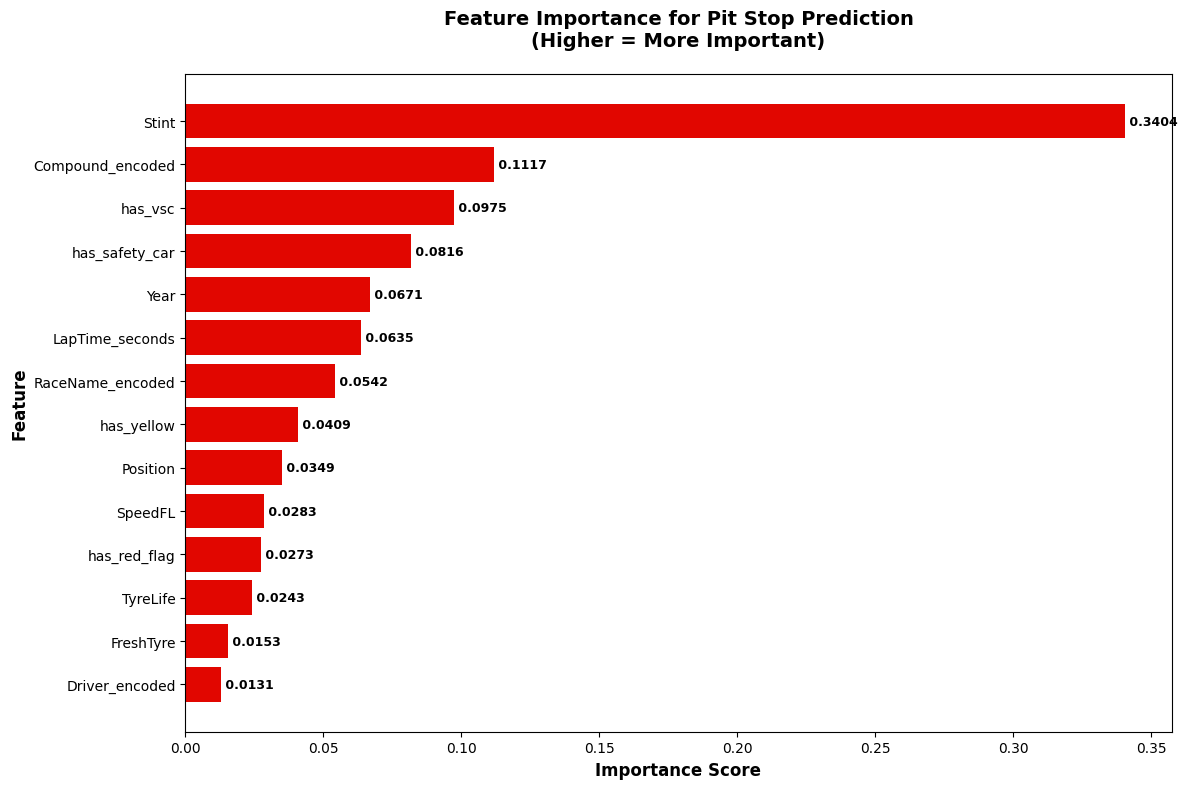


✅ FEATURE IMPORTANCE ANALYSIS COMPLETE!


In [11]:
# Visualize Feature Importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='#e10600')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Feature', fontsize=12, fontweight='bold')
plt.title('Feature Importance for Pit Stop Prediction\n(Higher = More Important)', 
          fontsize=14, fontweight='bold', pad=20)
plt.gca().invert_yaxis()  # Highest importance at top

# Add value labels on bars
for i, (feature, importance) in enumerate(zip(importance_df['Feature'], importance_df['Importance'])):
    plt.text(importance, i, f' {importance:.4f}', 
             va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../models/feature_importance.png', dpi=300, bbox_inches='tight')
print("📊 Visualization saved to: models/feature_importance.png")
plt.show()

print("\n" + "=" * 70)
print("✅ FEATURE IMPORTANCE ANALYSIS COMPLETE!")
print("=" * 70)
